In [20]:
import cv2
#import requests
import shutil
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import matplotlib.pyplot as plt

#import random
#import torch

ImportError: Bindings generation error. Submodule name should always start with a parent module name. Parent name: cv2.cv2. Submodule name: cv2

In [2]:
import sys
print(sys.executable)

d:\Studying\GraduationThesis\venv\Scripts\python.exe


In [2]:

#Defind 2 URL of video for dataset
# List các video
#Video ngay 1
video_drunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day1"
video_undrunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day1"

#Video ngay 2
video_drunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2"
video_undrunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2"

#Video ngay 3
video_drunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day3"
video_undrunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day3"
#Video ngay 4
video_drunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day4"
video_undrunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day4"

#Video ngay 5
video_drunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day5"
video_undrunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day5"

#Video ngay 6
video_drunk_path_6 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day6"
video_undrunk_path_6 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day6"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" 1
images_drunk = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1"
images_undrunk = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 2
images_drunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day2"
images_undrunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day2"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 3
images_drunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day3"
images_undrunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day3"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 4
images_drunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day4"
images_undrunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day4"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 5
images_drunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day5"
images_undrunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day5"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 6
images_drunk_6 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day6"
images_undrunk_6 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day6"

# Đường dẫn tới thư mục chứa tất cả hình ảnh "drunk" và "undrunk"
train_undrunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\undrunk"
train_drunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\drunk"
test_undrunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\undrunk"
test_drunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\drunk"

# Đường dẫn tới thư mục train và test
train_path = "D:\\Studying\\GraduationThesis\\data\\train_data"
test_path = "D:\\Studying\\GraduationThesis\\data\\test_data"



In [4]:
def convert_video_to_images(video_path, images_path, video_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Không thể mở video: {video_path}")
        return

    os.makedirs(images_path, exist_ok=True)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration_seconds = frame_count / fps

    frame_number = 0
    current_second = 0
    count = 1  

    while cap.isOpened() and current_second <= duration_seconds:
        ret, frame = cap.read()
        if ret:
            current_second = frame_number / fps        
            frame_number += 1
            # Lưu một frame từ video mỗi giây
            if frame_number % fps == 0:
                frame_filename = os.path.join(images_path, f'{video_name}_{count}.jpg')
                cv2.imwrite(frame_filename, frame)
                count += 1  # Tăng count lên 1 sau khi lưu hình ảnh
            
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
            





In [5]:

# def for_videos_to_images(videos_directory, images_directory):
#     # Liệt kê tất cả các tệp trong thư mục video
#     for root, dirs, files in os.walk(videos_directory):
#         for file in files:
#             # Kiểm tra xem tệp có phải là video không
#             if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
#                 video_path = os.path.join(root, file)
#                 try : 
#                     convert_video_to_images(video_path, images_directory,1)
#                 except Exception  as e:
#                     print(f"Lỗi khi xử lý video {video_path}: {e}")
def for_videos_to_images(videos_directory, images_directory):
    # Liệt kê tất cả các tệp trong thư mục video
    for root, dirs, files in os.walk(videos_directory):
        for file in files:
            # Kiểm tra xem tệp có phải là video không
            if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
                video_path = os.path.join(root, file)
                video_name = os.path.splitext(file)[0]  # Tên video (không bao gồm phần mở rộng)
                #images_directory_for_video = os.path.join(images_directory, video_name)  # Thư mục lưu trữ hình ảnh cho video tương ứng
                #os.makedirs(images_directory_for_video, exist_ok=True)  # Tạo thư mục lưu trữ hình ảnh nếu chưa tồn tại
                try:
                    convert_video_to_images(video_path, images_directory, video_name)
                except Exception as e:
                    print(f"Lỗi khi xử lý video {video_path}: {e}")



In [69]:
# Chuyển đổi từng video undrunk trong danh sách
# Chuyển video sang hình ảnh ngày 1
for_videos_to_images(video_drunk_path,images_drunk)
for_videos_to_images(video_undrunk_path,images_undrunk)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [7]:
# Chuyển video sang hình ảnh ngày 2
for_videos_to_images(video_drunk_path_2,images_drunk_2)
for_videos_to_images(video_undrunk_path_2,images_undrunk_2)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [8]:
# Chuyển video sang hình ảnh ngày 3
for_videos_to_images(video_drunk_path_3,images_drunk_3)
for_videos_to_images(video_undrunk_path_3,images_undrunk_3)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [9]:
# Chuyển video sang hình ảnh ngày 4
for_videos_to_images(video_drunk_path_4,images_drunk_4)
for_videos_to_images(video_undrunk_path_4,images_undrunk_4)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [14]:
# Chuyển video sang hình ảnh ngày 5
for_videos_to_images(video_drunk_path_5,images_drunk_5)
for_videos_to_images(video_undrunk_path_5,images_undrunk_5)

print("Chuyển đổi hoàn thành!")

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_76.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_77.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_78.mov: OpenCV(4.10.0) D:\

In [9]:
# Chuyển video sang hình ảnh ngày 6
#for_videos_to_images(video_drunk_path_6,images_drunk_6)
for_videos_to_images(video_undrunk_path_6,images_undrunk_6)

print("Chuyển đổi hoàn thành!")

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_100.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_101.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_102.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_103.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_104.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_105.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\UnDrunk\Day6\PIR-206_106.mov: module 'cv2' has no attribute 'VideoCapture'
Lỗi khi xử lý video D:\Studying\GraduationThesis

In [16]:




# Tách dữ liệu thành tập train và tập test
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")


Tách dữ liệu thành công!


In [13]:
# Tách dữ liệu thành tập train và tập test ngày 2
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_2), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_2), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [14]:
# Tách dữ liệu thành tập train và tập test ngày 3
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_3), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_3), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [15]:
# Tách dữ liệu thành tập train và tập test ngày 4
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_4), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_4), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [17]:
# Tách dữ liệu thành tập train và tập test ngày 5
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_5), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_5), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [10]:
# Tách dữ liệu thành tập train và tập test ngày 6
#train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_6), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_6), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
#for image in train_drunk_data:
#    shutil.copy(os.path.join(images_drunk_6, image), os.path.join(train_path, "drunk", image))

#for image in test_drunk_data:
#    shutil.copy(os.path.join(images_drunk_6, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_6, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_6, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [4]:
image_size = 224

In [18]:
images_name = []
def train_data():
    train_data_undunk = [] 
    train_data_drunk=[]

    for image1 in tqdm(os.listdir(train_drunk)): 
        path = os.path.join(train_drunk, image1)
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)   
        images_name.append(image1)      
        img1 = cv2.imread(path)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(train_undrunk)): 
        path = os.path.join(train_undrunk, image2)
        images_name.append(image2)
        img2 = cv2.imread(path)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_undunk.append(img2) 
    train_data= np.concatenate((np.asarray(train_data_drunk),np.asarray(train_data_undunk)),axis=0)
    return train_data

In [12]:

train_data = train_data()

100%|██████████| 69/69 [00:00<00:00, 116.16it/s]


In [13]:
def test_data():
    test_data_drunk = [] 
    test_data_undrunk=[]
    for image1 in tqdm(os.listdir(test_drunk)): 
        path = os.path.join(test_drunk, image1)
        images_name.append(image1)    
        #img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)        
        img1 = cv2.imread(path)     
        img1 = cv2.resize(img1, (image_size, image_size))  
        test_data_drunk.append(img1) 
    for image2 in tqdm(os.listdir(test_undrunk)): 
        images_name.append(image2)    
        path = os.path.join(test_undrunk, image2)
        #img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)       
        img2 = cv2.imread(path)   
        img2 = cv2.resize(img2, (image_size, image_size))    
        test_data_undrunk.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_drunk),np.asarray(test_data_undrunk)),axis=0) 
    return test_data 

In [14]:
test_data  = test_data() 

100%|██████████| 18/18 [00:00<00:00, 125.87it/s]


In [15]:
# Kết hợp train_data và test_data thành một mảng x_data
x_data=np.concatenate((train_data,test_data),axis=0)
# Chuẩn hóa dữ liệu trong mảng x_data để giữ cho các giá trị nằm trong khoảng từ 0 đến 1
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [16]:
# Tạo mảng chứa 96 phần tử 0 và 96 phần tử 1 cho Y_train
z1 = np.zeros(69)
o1 = np.ones(100)
Y_train = np.concatenate((o1, z1), axis=0)

# Tạo mảng chứa 10 phần tử 0 và 10 phần tử 1 cho Y_test
z = np.zeros(18)
o = np.ones(25)
Y_test = np.concatenate((o, z), axis=0)

In [17]:

# Tạo mảng y_data bằng cách kết hợp Y_train và Y_test, sau đó thay đổi hình dạng
y_data = np.concatenate((Y_train, Y_test), axis=0).reshape(x_data.shape[0], 1)


In [18]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128, 3)
Y shape:  (212, 1)


In [19]:
from sklearn.model_selection import train_test_split

# Sử dụng train_test_split để chia dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Số lượng mẫu trong tập train và tập test
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

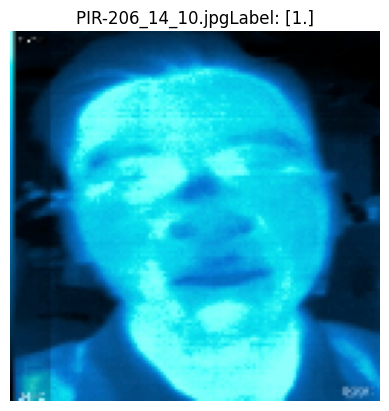

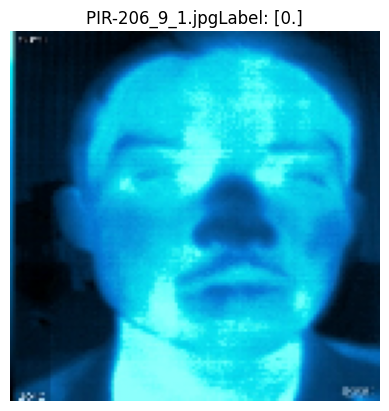

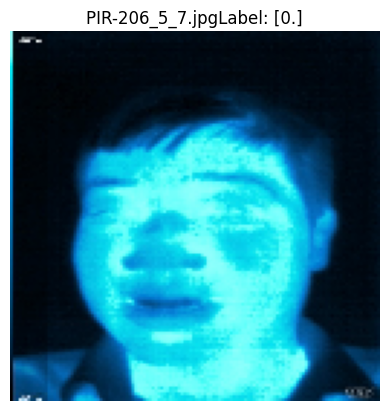

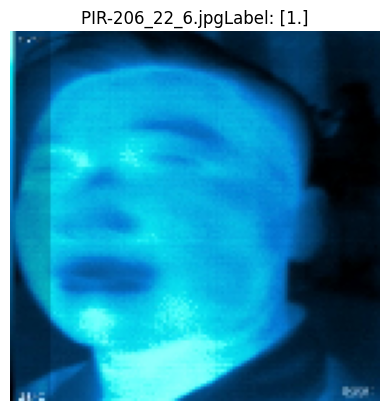

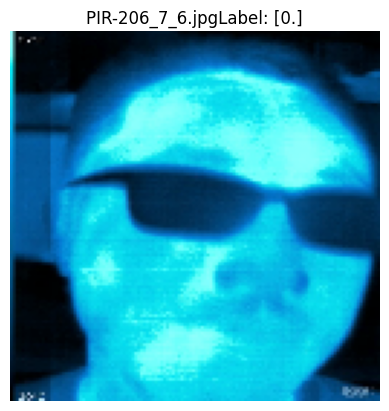

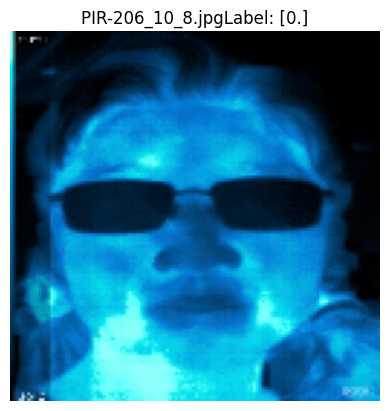

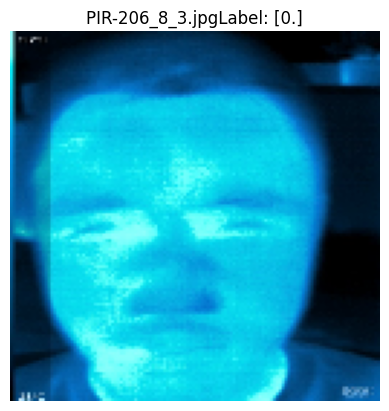

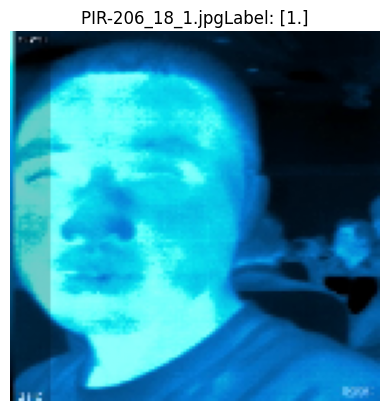

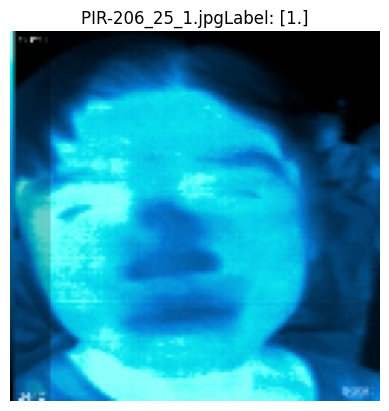

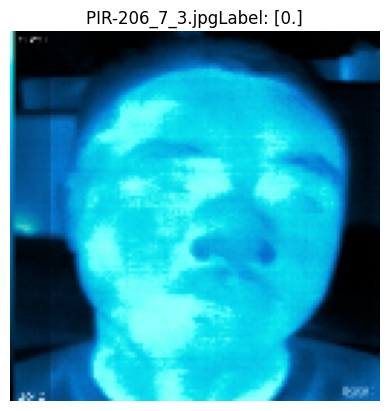

In [20]:

import numpy as np

# Tạo danh sách chứa tên của các hình ảnh
#image_names = [os.path.basename(image_path) for image_path in image_paths]
# Chọn và hiển thị 10 hình ảnh ngẫu nhiên từ tập dữ liệu
for _ in range(10):
    index = np.random.randint(0, x_data.shape[0])  # Chọn một chỉ số ngẫu nhiên từ 0 đến số lượng hình ảnh - 1
    random_image = x_data[index]  # Lấy hình ảnh tương ứng với chỉ số ngẫu nhiên
    name = images_name[index]
    # In hình ảnh ra màn hình
    plt.imshow(random_image)
    plt.title(name + 'Label: ' + str(y_data[index]))  # In nhãn của hình ảnh
    plt.axis('off')  # Ẩn các trục
    plt.show()


In [21]:
# Chuyển đổi mỗi mảng hình ảnh trong x_train và x_test từ dạng ba chiều sang dạng một chiều
#Mô hình Logistic Regression thường mong đợi đầu vào ở dạng một vector, 
#do đó việc chuyển đổi từ mảng 3 chiều sang mảng 1 chiều là bước cần thiết để đưa dữ liệu vào mô hình này.
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

# In hình dạng của các mảng đã chuyển đổi
print("X train flatten:", x_train_flatten.shape)
print("X test flatten:", x_test_flatten.shape)


X train flatten: (169, 49152)
X test flatten: (43, 49152)


In [22]:
# Chuyển vị các mảng x_train_flatten, x_test_flatten, y_train, và y_test
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T

# In hình dạng của các mảng sau khi chuyển vị
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (49152, 169)
x test:  (49152, 43)
y train:  (1, 169)
y test:  (1, 43)


In [55]:
import matplotlib.pyplot as plt
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    #Xác định số chiều của dữ liệu đầu vào bằng cách lấy kích thước của chiều đầu tiên của x_train.
    dimension =  x_train.shape[0]
    # Khởi tạo trọng số và bias ban đầu bằng cách sử dụng hàm initialize_weights_and_bias với số chiều của dữ liệu.
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21864\2156312011.py:15: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: 0.036571
Cost after iteration 300: 0.011518
Cost after iteration 400: 0.007079
Cost after iteration 500: 0.005412
Cost after iteration 600: 0.004527
Cost after iteration 700: 0.003962
Cost after iteration 800: 0.003560
Cost after iteration 900: 0.003256
Cost after iteration 1000: 0.003015
Cost after iteration 1100: 0.002818
Cost after iteration 1200: 0.002653
Cost after iteration 1300: 0.002513
Cost after iteration 1400: 0.002391
Cost after iteration 1500: 0.002285
Cost after iteration 1600: 0.002190
Cost after iteration 1700: 0.002106
Cost after iteration 1800: 0.002029
Cost after iteration 1900: 0.001959


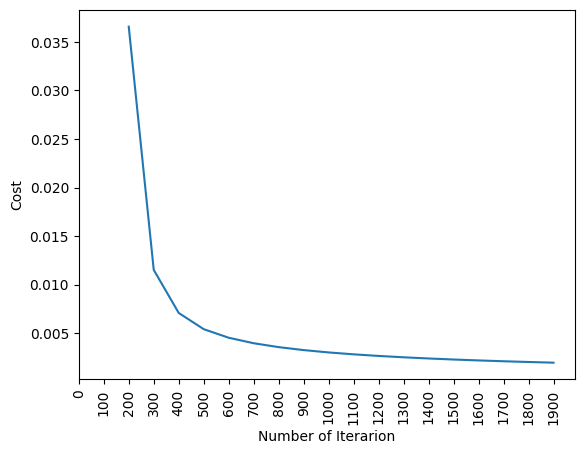

Test Accuracy: 95.35 %
Train Accuracy: 100.0 %


In [62]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.008, num_iterations = 2000)

In [23]:
# Hyperparameter Tunning: GridSearcCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
logistic_regression = LogisticRegression(random_state=42)
log_reg_cv = GridSearchCV(logistic_regression, grid, cv=10)
log_reg_cv.fit(x_train.T, y_train.T)


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [24]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 1.0, 'penalty': 'l2'}
accuracy:  0.9705882352941178


In [25]:
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 1.0 


d:\Studying\GraduationThesis\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 1.0 


In [94]:
def preprocess_image(image):
    # Resize hình ảnh về kích thước phù hợp với đầu vào của mô hình
    resized_image = cv2.resize(image, (image_size, image_size))  # Thay width và height bằng kích thước đầu vào mong muốn
    # Làm phẳng hình ảnh thành một mảng một chiều
    image_reshape = resized_image.flatten()
    # Reshape đầu ra thành một vector cột
    image_reshape = image_reshape.reshape(-1, 1)
    print(image_reshape.shape)
    return image_reshape.T

# Tiền xử lý hình ảnh mới
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_drunk\\PIR-206_16_9.jpg"
#path = "D:\\Studying\\GraduationThesis\\data\\test_data\\test_undrunk\\PIR-206_10_4.jpg" 
#path = "D:\\Studying\\GraduationThesis\\test\\drunk\\test_drunk_2.jpg"     
#path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\test_undrunk_8.jpg"     
path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg" 

img = cv2.imread(path)     
new_image = preprocess_image(img)
# Dự đoán nhãn của một hình ảnh từ đường dẫn
predicted_proba  = log_reg_cv.predict_proba(new_image)
predicted_label = log_reg_cv.predict(new_image)

# Hiển thị phần trăm của từng lớp
classes = log_reg_cv.classes_ 
for i, class_name in enumerate(classes):
    print(f"Probability of class '{class_name}': {predicted_proba [0][i] * 100:.2f}%")
print("Predicted label:", predicted_label)


(49152, 1)
Probability of class '0.0': 0.00%
Probability of class '1.0': 100.00%
Predicted label: [1.]


In [95]:
test_path_drunk = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2\\PIR-206_38.mov"
test_path_undrunk = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2\\PIR-206_33.mov"
path_save_drunk = "D:\\Studying\\GraduationThesis\\test\\drunk\\2"
path_save_undrunk = "D:\\Studying\\GraduationThesis\\test\\undrunk\\4"



In [32]:
# Test drunk
convert_video_to_images(test_path_drunk,path_save_drunk,"test_drunk")

In [96]:
#Test undrunk
convert_video_to_images(test_path_undrunk,path_save_undrunk,"test_undrunk")

In [77]:
def predict_proba_all_images(directory_path):
    image_paths = [os.path.join(directory_path, image) for image in os.listdir(directory_path)]
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        # Làm phẳng hình ảnh thành một mảng một chiều
        img = img.flatten()
        # Reshape đầu ra thành một vector cột
        img = img.reshape(-1, 1)        
        print(image_path)
        # Dự đoán xác suất thuộc mỗi lớp
        predicted_label = log_reg_cv.predict(img.T)
        print("Predicted label:", predicted_label)

In [97]:
predict_proba_all_images(path_save_undrunk)

D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_1.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_2.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_3.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_4.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_5.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_6.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_7.jpg
Predicted label: [0.]
D:\Studying\GraduationThesis\test\undrunk\4\test_undrunk_8.jpg
Predicted label: [0.]


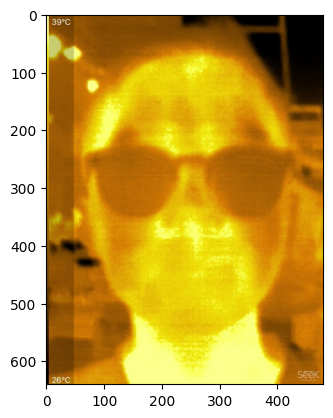

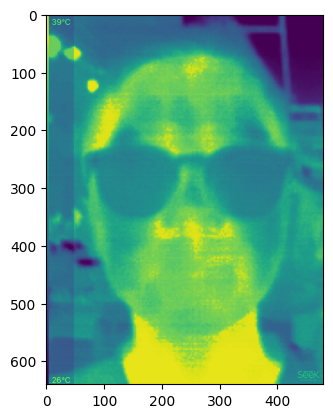

Temperature Histogram: [1.99511722e-02 3.84440110e-03 1.75781245e-03 2.01171869e-03
 1.40299473e-03 1.19140628e-03 1.18815107e-03 1.72851561e-03
 1.77734380e-03 1.31184899e-03 1.13932288e-03 8.23567680e-04
 1.16536464e-03 4.75260429e-04 5.89192729e-04 6.99869765e-04
 5.69661439e-04 1.13606767e-03 8.49609380e-04 6.64062507e-04
 5.53385413e-04 6.67317712e-04 6.83593738e-04 7.09635438e-04
 7.42187491e-04 7.03125028e-04 5.24088566e-04 3.77604156e-04
 4.32942703e-04 4.06901032e-04 4.45963553e-04 5.11067687e-04
 4.32942703e-04 4.88281250e-04 4.10156237e-04 3.93880211e-04
 5.79427055e-04 5.07812481e-04 5.72916644e-04 5.24088566e-04
 5.85937523e-04 4.75260429e-04 4.81770840e-04 5.40364592e-04
 5.56640618e-04 7.68229191e-04 6.93359354e-04 6.64062507e-04
 6.86848944e-04 6.11979165e-04 7.25911465e-04 7.71484396e-04
 7.71484396e-04 6.47786481e-04 6.44531276e-04 5.76171849e-04
 5.76171849e-04 6.44531276e-04 6.38020807e-04 6.47786481e-04
 7.61718722e-04 6.70572917e-04 4.68749990e-04 7.22656259e-04
 

In [6]:
import cv2
import numpy as np

def calculate_temperature_histogram(image):
    # Chuyển đổi không gian màu từ BGR sang RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    # Chuyển đổi ảnh sang không gian màu nhiệt độ
    temperature_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     # In hình ảnh ra màn hình
    plt.imshow(temperature_image)
    plt.show()
    # Tính toán histogram của các mức sáng nhiệt độ
    hist = cv2.calcHist([temperature_image], [0], None, [256], [0, 256])
    
    # Chuẩn hóa histogram
    hist /= np.sum(hist)
    
    return hist.flatten()

# Load ảnh
image_path = "D:\\Studying\\GraduationThesis\\test\\undrunk\\2\\test_undrunk_4.jpg"
image = cv2.imread(image_path)

# Tính toán histogram của các mức sáng nhiệt độ trên ảnh
temperature_hist = calculate_temperature_histogram(image)

# In histogram
print("Temperature Histogram:", temperature_hist)

In [6]:


# Đường dẫn đến pre-trained Haar Cascade Classifier
cascade_path = "path_to_haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# Đường dẫn đến hình ảnh
image_path = "path_to_your_image.jpg"

# Đọc ảnh
image = cv2.imread(image_path)

# Chuyển ảnh sang đen trắng để tăng cường tốc độ xử lý
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Haar Cascade Classifier để nhận diện khuôn mặt
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Lặp qua các khuôn mặt được nhận diện và cắt chúng ra khỏi ảnh
for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imwrite("face.jpg", face)  # Lưu khuôn mặt ra file

# Hiển thị ảnh với khuôn mặt đã được cắt ra
cv2.imshow("Detected Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Mô hình CNN

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten,BatchNormalization #action detectionimport tensorflow
import matplotlib.pyplot as plt
from IPython.display import HTML

# import setuptools.dist
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
# import matplotlib.pyplot as plt
# from IPython.display import HTML

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

train_datagen = ImageDataGenerator(
        rescale=1./255, #Chuẩn hóa các giá trị điểm ảnh trong hình ảnh về khoảng [0, 1].
        rotation_range=10, #Tăng cường dữ liệu bằng cách xoay hình ảnh ngẫu nhiên trong khoảng [-15, 15] độ.
        horizontal_flip=True, #Lật ngược hình ảnh theo chiều ngang.
        fill_mode = 'reflect', #lấp đầy các pixel bị mất khi thực hiện các phép biến đổi.
        #width_shift_range = 0.1, #dịch chuyển hình ảnh ngẫu nhiên theo chiều ngang trong khoảng [-10%, 10%] của chiều rộng hình ảnh
        #height_shift_range = 0.1, #ịch chuyển hình ảnh ngẫu nhiên theo chiều dọc trong khoảng [-10%, 10%] của chiều cao hình ảnh.
        zoom_range = 0.05, #phóng to hoặc thu nhỏ hình ảnh ngẫu nhiên trong khoảng [80%, 120%] của kích thước gốc.
        #shear_range = 0.1, #cắt (shear transformation) với góc cắt ngẫu nhiên trong khoảng [-10%, 10%].
)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        #class_mode="binary"
)

Found 534 images belonging to 2 classes.


In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    #print(image_batch[0])
    break

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [48]:
class_names = list(train_generator.class_indices.keys())
class_names

['drunk', 'undrunk']

In [5]:
# Bộ dữ liệu validate
test_datagen = ImageDataGenerator(
    rescale=1./255,       # Thay đổi tỷ lệ giá trị pixel từ [0, 255] thành [0, 1]
)

# Tạo một bộ tạo dữ liệu tải hình ảnh từ thư mục được chỉ định
test_generator = test_datagen.flow_from_directory(
    test_path,                 # Đường dẫn đến thư mục chứa hình ảnh
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Thay đổi kích thước hình ảnh thành (IMAGE_SIZE, IMAGE_SIZE)
    #class_mode="binary"        # Trả lại nhãn dưới dạng số nguyên
)

Found 138 images belonging to 2 classes.


In [37]:
class_names = list(test_generator.class_indices.keys())
class_names

['drunk', 'undrunk']

In [60]:
for image_batch, label_batch in test_generator:
    #print(image_batch[0][0])
    print(label_batch)
    print(label_batch.count())
    break


[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [23]:
sz = 224

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu')) #dụng 32 bộ lọc tích chập kích thước 3x3 lên ảnh đầu vào. Dạng đầu vào được chỉ định là (224, 224, 3), trong đó 3 đại diện cho các kênh màu RGB.
model.add(MaxPooling2D(pool_size=(2, 2)))#Lớp này giảm kích thước không gian (chiều cao và chiều rộng) của đầu vào bằng cách sử dụng gộp tối đa với kích thước 2x2.
# Second convolution layer and pooling
model.add(Convolution2D(64, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten()) #: Lớp này trải phẳng đầu ra 3D của các lớp tích chập thành một vector 1D.

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu')) # Một lớp kết nối đầy đủ với 96 đơn vị và hàm kích hoạt ReLU.
model.add(Dropout(0.40)) #Dropout được áp dụng để giảm hiện tượng overfitting. 40% số neuron sẽ được thiết lập ngẫu nhiên về 0 trong quá trình huấn luyện.
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
sz = 224

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu')) #dụng 32 bộ lọc tích chập kích thước 3x3 lên ảnh đầu vào. Dạng đầu vào được chỉ định là (224, 224, 3), trong đó 3 đại diện cho các kênh màu RGB.
model.add(MaxPooling2D(pool_size=(2, 2)))#Lớp này giảm kích thước không gian (chiều cao và chiều rộng) của đầu vào bằng cách sử dụng gộp tối đa với kích thước 2x2.
# Second convolution layer and pooling
model.add(Convolution2D(64, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten()) #: Lớp này trải phẳng đầu ra 3D của các lớp tích chập thành một vector 1D.

# Adding a fully connected layer
model.add(Dense(units=128, activation='relu')) # Một lớp kết nối đầy đủ với 96 đơn vị và hàm kích hoạt ReLU.
model.add(Dropout(0.40)) #Dropout được áp dụng để giảm hiện tượng overfitting. 40% số neuron sẽ được thiết lập ngẫu nhiên về 0 trong quá trình huấn luyện.
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax')) # softmax for more than 2

# Độ chính sách đang là accuracy: 0.9179 - loss: 0.2665

d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [64]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

Epoch 1/15


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 650ms/step - accuracy: 0.5490 - loss: 1.1849 - val_accuracy: 0.5870 - val_loss: 0.6412
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 648ms/step - accuracy: 0.6856 - loss: 0.5944 - val_accuracy: 0.7101 - val_loss: 0.5584
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 688ms/step - accuracy: 0.7482 - loss: 0.4904 - val_accuracy: 0.7319 - val_loss: 0.5094
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 639ms/step - accuracy: 0.8077 - loss: 0.3988 - val_accuracy: 0.7971 - val_loss: 0.4059
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 646ms/step - accuracy: 0.8274 - loss: 0.3379 - val_accuracy: 0.7681 - val_loss: 0.4622
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 603ms/step - accuracy: 0.8552 - loss: 0.3565 - val_accuracy: 0.7899 - val_loss: 0.5331
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 609ms/step - accuracy: 0.8397 - loss: 0.3477 - val_accuracy: 0.8768 - val_loss: 0.3438
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 645ms/step - accuracy: 0.8841 - loss: 0.2545 - val_accuracy: 0.847

In [39]:

# Model điều chỉnh ngày 9/7/2024
# 94 tr
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.9664 - loss: 0.2363
#17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.9593 - loss: 0.2255

#Chỉnh thành 16
#stop30
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9521 - loss: 0.1089
#17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - accuracy: 0.9848 - loss: 0.0692

#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, không có maxpooling ở lớp 3
#stop28
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9634 - loss: 0.1025
#17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.9716 - loss: 0.1031
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, sửa dense  256 => Tệ
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8943 - loss: 0.3123
#17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.8771 - loss: 0.3324
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, có  maxpooling ở lớp 3
# 5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9007 - loss: 0.2941 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.9488 - loss: 0.1447 
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, không có BatchNormalization ở lớp 3 - stop 30
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9259 - loss: 0.2083 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.9608 - loss: 0.0790
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, có batch ở lớp 3, không có maxpooling ở lớp 3, chuyển learning rate xuống 3 - stop26
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9773 - loss: 0.1018 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.9923 - loss: 0.0603
sz = 224
# Khởi tạo mô hình CNN
model = Sequential()

# Lớp tích chập và gộp đầu tiên

model.add(Convolution2D(16, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Lớp tích chập và gộp thứ hai
model.add(Convolution2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Lớp tích chập và gộp thứ ba
model.add(Convolution2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Trải phẳng các lớp
model.add(Flatten())

# Thêm lớp kết nối đầy đủ
model.add(Dense(units=128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax')) # sử dụng sigmoid 2 lớp

model.summary()







d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,175,202 (84.59 MB)

 Trainable params: 22,175,170 (84.59 MB)

 Non-trainable params: 32 (128.00 B)

In [40]:
# Compile mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:

from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

#ReduceLROnPlateau : tự động giảm learning rate khi hiệu suất của mô hình không cải thiện sau một số epoch nhất định. Điều này có thể giúp mô hình thoát khỏi các local minima hoặc các plateau trong quá trình huấn luyện, từ đó cải thiện hiệu suất của mô hình.


learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', #, val_accuracy (độ chính xác trên tập validation) được sử dụng.
    patience=3, #nếu val_accuracy không cải thiện sau 3 epoch, learning rate sẽ bị giảm.
    factor=0.5, #learning rate sẽ bị giảm xuống một nửa mỗi khi điều kiện patience được thỏa mãn.
    min_lr=0.00001, #ngăn chặn learning rate trở nên quá nhỏ, gây ảnh hưởng đến quá trình huấn luyện.
    verbose=1 #thông báo trên console mỗi khi learning rate bị giảm.
)
# Tạo callback để dừng sớm khi mô hình không cải thiện nữa
early_stopping = EarlyStopping(
    monitor='val_loss', #val_loss (mức độ lỗi trên tập validation) được sử dụng.
    patience= 5, # nếu val_loss không cải thiện sau 3 epoch, quá trình huấn luyện sẽ dừng.
    verbose=1, #có thông báo trên console khi quá trình huấn luyện dừng sớm.
    restore_best_weights=True #khôi phục các trọng số từ epoch có hiệu suất tốt nhất trước khi dừng huấn luyện.
    )

# Tạo callback để lưu lại mô hình tốt nhất dưới dạng SavedModel
# model_checkpoint = ModelCheckpoint(
#     'model/model6.keras', 
#     monitor='val_loss', # theo dõi hiệu suất của mô hình
#     save_best_only=True, 
#     verbose=1)

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Huấn luyện mô hình với các callback
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40, # Số lượng epoch
    callbacks=[early_stopping, learning_rate_reduction], # Các callback được sử dụng
)




Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 903ms/step - accuracy: 0.5331 - loss: 13.4282 - val_accuracy: 0.6739 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 788ms/step - accuracy: 0.6150 - loss: 0.6808 - val_accuracy: 0.6812 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 648ms/step - accuracy: 0.7054 - loss: 0.6505 - val_accuracy: 0.7029 - val_loss: 0.6852 - learning_rate: 0.0010
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 641ms/step - accuracy: 0.7514 - loss: 0.5531 - val_accuracy: 0.7536 - val_loss: 0.6545 - learning_rate: 0.0010
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 674ms/step - accuracy: 0.7550 - loss: 0.4646 - val_accuracy: 0.6884 - val_loss: 0.6616 - learning_rate: 0.0010
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 805ms/step - accuracy: 0.8094 - loss: 0.4187 - val_accuracy: 0.7101 - val_loss: 0.6283 - learning_rate: 0.0010
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 735ms/step - accuracy: 0.8291 - loss: 0

In [42]:
# Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
scores = model.evaluate(test_generator)
scores = model.evaluate(train_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9658 - loss: 0.0838 
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.9939 - loss: 0.0252


In [70]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Đánh giá mô hình trên tập dữ liệu kiểm tra
scores = model.evaluate(test_generator)
print("Loss: ", scores[0])
print("Accuracy: ", scores[1])

# Dự đoán trên tập dữ liệu kiểm tra
y_pred_prob = model.predict(test_generator)
print(y_pred_prob[0])
y_pred = np.argmax(y_pred_prob)
print('y_pred '+ str(y_pred))
# Lấy nhãn thực tế từ generator
y_true = test_generator.classes
print('y_true' + y_true)
# Tính toán Precision, Recall và F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9571 - loss: 0.1085
Loss:  0.08738411217927933
Accuracy:  0.9637681245803833
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
[3.5734859e-06 9.9999642e-01]
y_pred 67


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U6'), dtype('int32')) -> None

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Lấy các dự đoán và nhãn thực tế từ mô hình
predictions = model.predict(test_generator_augment_off)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_augment_off.classes

# Tính toán các độ đo đánh giá
report = classification_report(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(report)
print(conf_matrix)

# Để lấy recall và F1 score riêng lẻ:
from sklearn.metrics import recall_score, f1_score

recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Macro-averaged Recall:", recall)
print("Macro-averaged F1 Score:", f1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.94      0.98      0.96        63

    accuracy                           0.96       138
   macro avg       0.96      0.97      0.96       138
weighted avg       0.96      0.96      0.96       138

[[71  4]
 [ 1 62]]
Macro-averaged Recall: 0.9653968253968254
Macro-averaged F1 Score: 0.9636133523176713


In [98]:
# Tạo một bộ tạo dữ liệu tải hình ảnh từ thư mục được chỉ định
test_generator_augment_off  = test_datagen.flow_from_directory(
    test_path,                 # Đường dẫn đến thư mục chứa hình ảnh
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Thay đổi kích thước hình ảnh thành (IMAGE_SIZE, IMAGE_SIZE)
    #class_mode="binary"        # Trả lại nhãn dưới dạng số nguyên,
     shuffle=False
)
# Dự đoán trên dữ liệu kiểm tra
y_pred_prob = model.predict(test_generator_augment_off)
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred)
# Lấy nhãn thật sự từ test_generator và sắp xếp lại
y_test_one_hot = test_generator_augment_off.classes  # .classes trả về nhãn class dạng số
y_test = y_test_one_hot
print(y_test)

# Tính Precision, Recall và F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Found 138 images belonging to 2 classes.


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Precision: 0.9647837066315328
Recall: 0.9637681159420289
F1 Score: 0.9638197038168149


In [56]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

def evaluate_generator(model, data_generator):
    y_true = data_generator.classes  # Nhãn thực tế
    print(y_true)
    y_pred_prob = model.predict(data_generator)  # Dự đoán xác suất
    
    y_pred = np.argmax(y_pred_prob, axis=1)  # Chuyển đổi xác suất thành nhãn dự đoán
    print(y_pred)
    #print(y_pred)

    # Tính toán Precision, Recall và F1-score
    report = classification_report(y_true, y_pred, target_names=data_generator.class_indices)
    
    return report

# Đánh giá trên tập test
test_report = evaluate_generator(model, test_generator)
print("\nTest Classification Report:")
print(test_report)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
[0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1]

Test Classification Report:
              precision    recall  f1-score   support

       drunk       0.56      0.53      0.54        75
     undrunk       0.47      0.49      0.48        63

    accuracy                           0.51       138
   macro avg       0.51      0.51      0.51       138
weighted avg       0.52      0.51      0.52       138



In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

30

In [47]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.9717557430267334,
 0.5567877888679504,
 0.48384717106819153,
 0.5085761547088623,
 0.39100101590156555]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

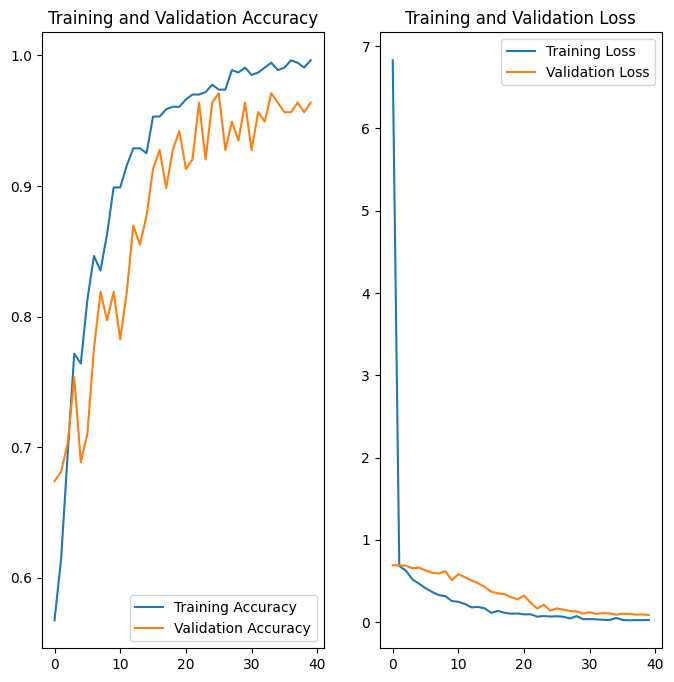

In [45]:
import matplotlib.pyplot as plt
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Tải lại mô hình đã lưu
# loaded_model = tf.keras.models.load_model('models/best_model')  # hoặc 'model/my_model.keras'
loaded_model =tf.keras.models.load_model('models/best_model')
# Kiểm tra mô hình đã tải lại
loaded_model.summary()

ValueError: File format not supported: filepath=models/best_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(models/best_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [68]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    #Điều này biến mảng từ dạng (height, width, channels) thành (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)
    #print(img_array)
    predictions = model.predict(img_array)
    print('predictions')
    print(predictions)
    print('predictions argmax')
    print(np.argmax(predictions[0]))
    predicted_class = class_names[np.argmax(predictions[0])]
    print('predicted_class')
    print(predicted_class)
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

['drunk', 'undrunk']
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predictions
[[0.9624333  0.03756667]]
predictions argmax
0
predicted_class
drunk
[1. 0.]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predictions
[[0.9972863  0.00271372]]
predictions argmax
0
predicted_class
drunk
[1. 0.]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1

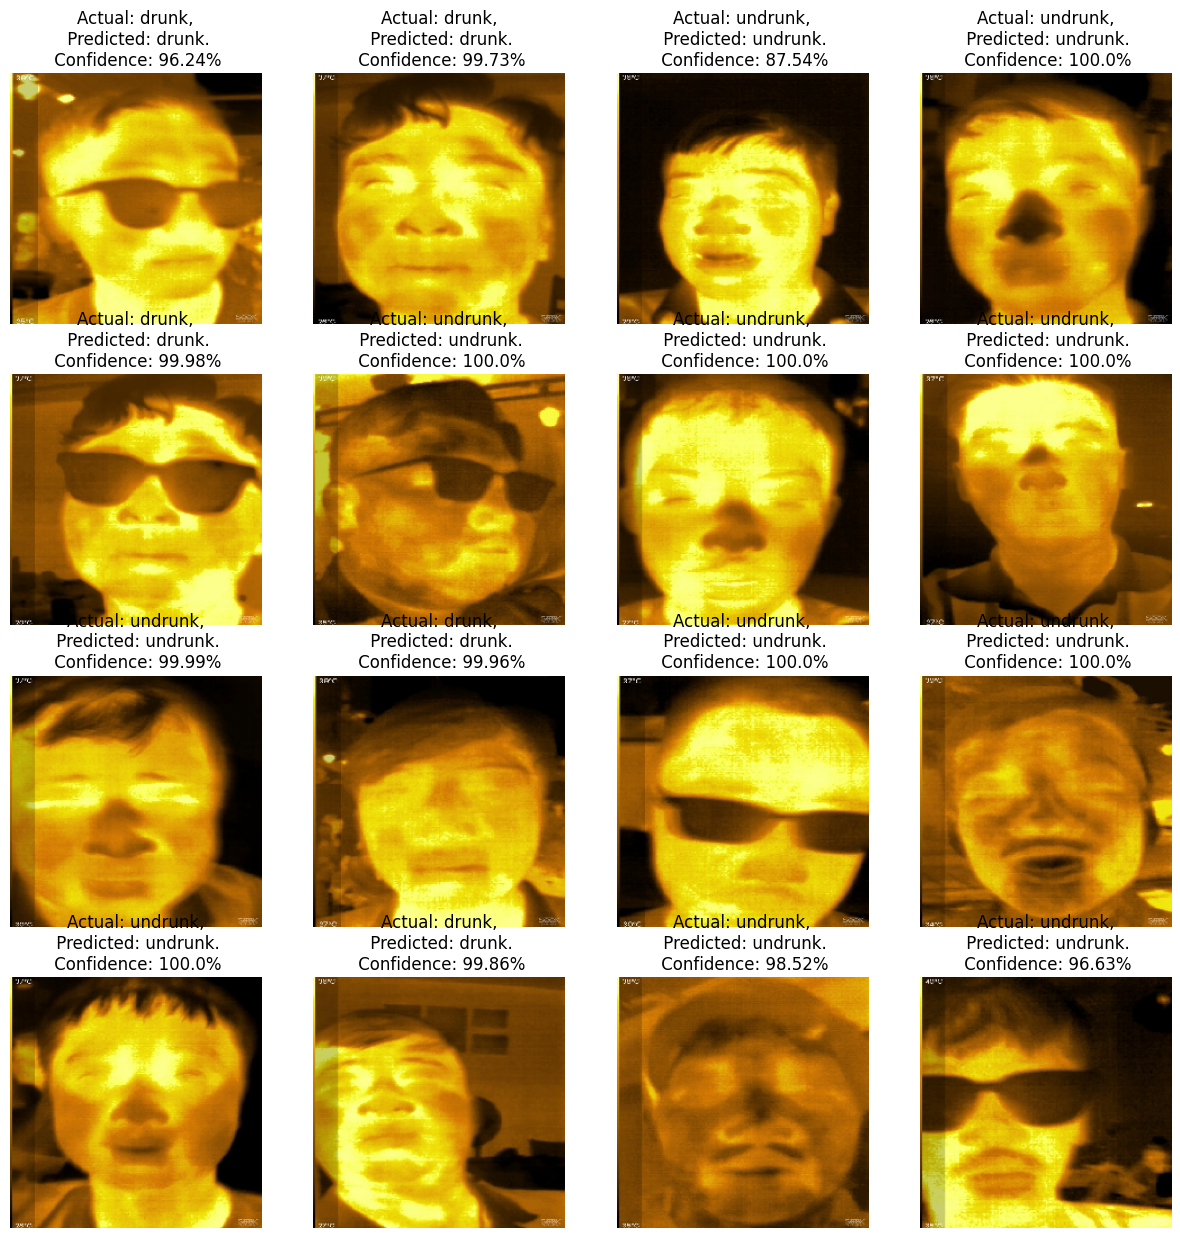

In [69]:
plt.figure(figsize=(15, 15))
print(class_names)
for images, labels in test_generator:
    for i in range(16):
        print(labels)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        print(labels[i])
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [100]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.export('models/best_model1')
model.save("model/best_model1.keras")


INFO:tensorflow:Assets written to: models/best_model1\assets


INFO:tensorflow:Assets written to: models/best_model1\assets


Saved artifact at 'models/best_model1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_260')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2344954245008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344954242896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950217040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950215120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344952677776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344952692560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950214352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950208976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950208592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950210320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2344950210128: TensorSpec(sh

In [64]:
# Tạo một TFLite Converter từ mô hình đã huấn luyện
converter = tf.lite.TFLiteConverter.from_saved_model('models/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Chuyển đổi mô hình thành định dạng TensorFlow Lite
tflite_converted_model = converter.convert()

# Lưu mô hình TensorFlow Lite vào một tệp .tflite
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_converted_model)

In [127]:
print(tf.version.VERSION)
print(model.save_spec() is None)

2.16.1


AttributeError: 'Sequential' object has no attribute 'save_spec'

In [55]:
import numpy as np
import tensorflow as tf


# Tạo một mô hình Sequential
trained_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Biên dịch mô hình với hàm mất mát và trình tối ưu
trained_model.compile(optimizer='sgd', loss='mean_squared_error') 

# Dữ liệu đầu vào và đầu ra
x_train = np.array([-1, 0, 1], dtype=np.float32)
y_train = np.array([-3, -1, 1], dtype=np.float32)

# Huấn luyện mô hình
trained_model.fit(x=x_train, y=y_train, epochs=5)

trained_model.export('models/model')

# Tạo một TFLite Converter từ mô hình đã huấn luyện
converter = tf.lite.TFLiteConverter.from_saved_model('models/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Chuyển đổi mô hình thành định dạng TensorFlow Lite
tflite_converted_model = converter.convert()

# Lưu mô hình TensorFlow Lite vào một tệp .tflite
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_converted_model)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 3.2120
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.9897
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.7620
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5467
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3420
INFO:tensorflow:Assets written to: models/model\assets


INFO:tensorflow:Assets written to: models/model\assets


Saved artifact at 'models/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_387')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2623005083408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005083024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005085712: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [13]:
model.save('models/tfjs_model/model.h5')

In [2]:
import tensorflowjs as tfjs
import tensorflow as tf
import numpy as np 
np.int = int    
tfjs.converters.save_keras_model('models/tfjs_model/model.h5', 'models/tfjs_model')


d:\Studying\GraduationThesis\venv\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
# Python

import tensorflowjs as tfjs

tfjs_target_dir = "models/tfjs_model"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

d:\Studying\GraduationThesis\venv\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow

sz = 224
model = Sequential()

# Lớp tích chập và gộp đầu tiên
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu', name = "conv1"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))

# Lớp tích chập và gộp thứ hai
model.add(Convolution2D(64, (3, 3), activation='relu'),name = "conv2")
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2) , name='pool2'))

# Lớp tích chập và gộp thứ ba
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


# Trải phẳng các lớp
model.add(Flatten(name='flatten'))

# Thêm lớp kết nối đầy đủ
model.add(Dense(units=128, activation='relu', name='dense1'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu', name='dense2'))
model.add(Dropout(0.4))
model.add(Dense(units=7, activation='softmax')) # sử dụng softmax cho hơn 2 lớp


# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In ra cấu trúc của mô hình
model.summary()


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: Sequential.add() got an unexpected keyword argument 'name'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), name='conv1'),
    MaxPooling2D((2, 2), name='pool1'),
    Conv2D(64, (3, 3), activation='relu', name='conv2'),
    MaxPooling2D((2, 2), name='pool2'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='dense1'),
    Dropout(0.4, name='dropout1'),
    Dense(32, activation='relu', name='dense2'),
    Dropout(0.4, name='dropout2'),
    Dense(7, activation='sigmoid', name='output')
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# In ra cấu trúc của mô hình
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,396,679 (28.22 MB)

 Trainable params: 7,396,679 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Chọn lớp bạn muốn trích xuất đặc trưng
layer_names = ['conv2d_3', 'max_pooling2d_2', 'conv2d_4', 'max_pooling2d_3']

# Tạo một mô hình con
outputs = [model.get_layer(name).output for name in layer_names]
feature_model = Model(inputs=model.input, outputs=outputs)


ValueError: The layer sequential_7 has never been called and thus has no defined input.

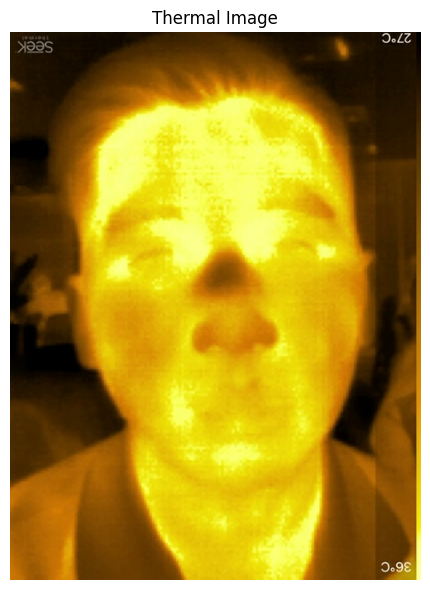

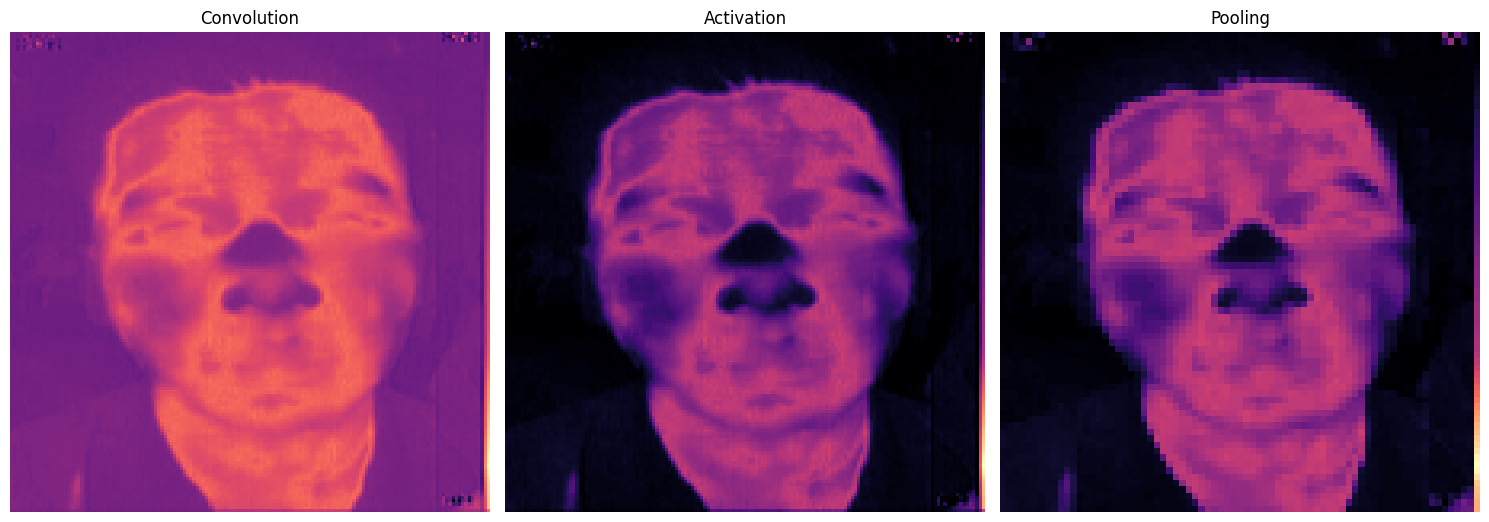

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_3_2.jpg')



image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB
# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])



# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


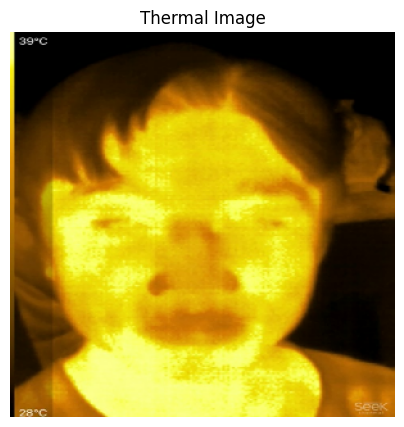

Red channel - Mean: 148.03797912597656, Stddev: 95.1294174194336, Min: 0.0, Max: 255.0
Green channel - Mean: 121.58226776123047, Stddev: 93.34330749511719, Min: 0.0, Max: 255.0
Blue channel - Mean: 17.076629638671875, Stddev: 33.85854721069336, Min: 0.0, Max: 240.5496826171875


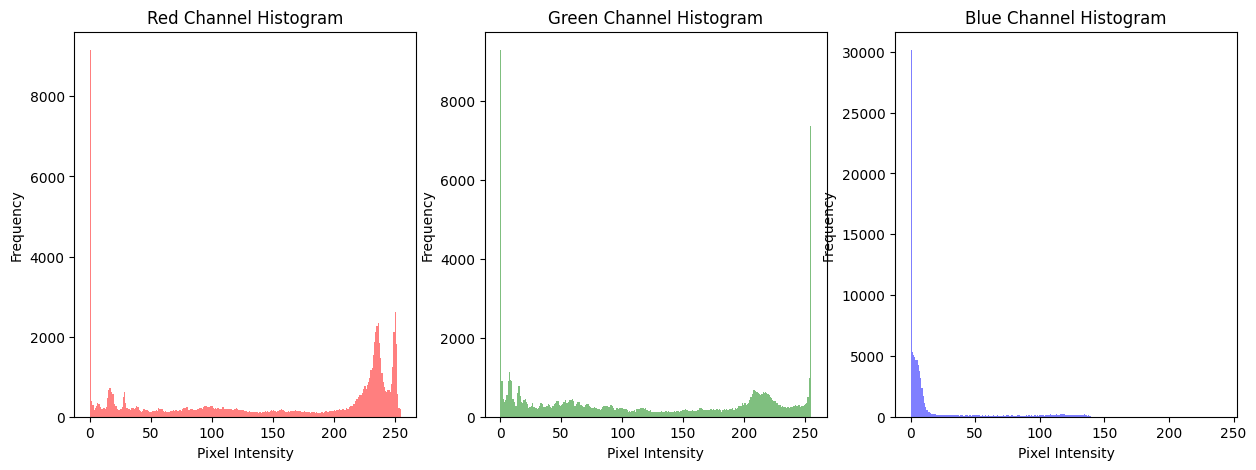

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Tải hình ảnh
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Đọc ảnh với 3 kênh màu (RGB)
image = tf.image.resize(image, size=[300, 300])

# Hiển thị hình ảnh
img = tf.squeeze(image).numpy().astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

# Chuyển đổi hình ảnh thành kiểu dữ liệu float32
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

# Tách các kênh màu
r, g, b = tf.split(image, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")

# Vẽ histogram của các kênh màu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(tf.reshape(r, [-1]), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(tf.reshape(g, [-1]), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(tf.reshape(b, [-1]), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


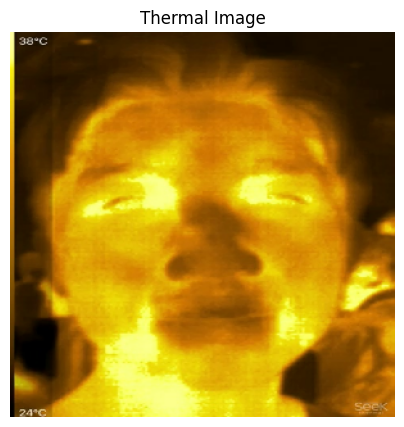

Red channel - Mean: 162.0916290283203, Stddev: 75.91597747802734, Min: 0.0, Max: 255.0
Green channel - Mean: 117.75628662109375, Stddev: 71.66792297363281, Min: 0.0, Max: 255.0
Blue channel - Mean: 10.513372421264648, Stddev: 25.873741149902344, Min: 0.0, Max: 228.09971618652344


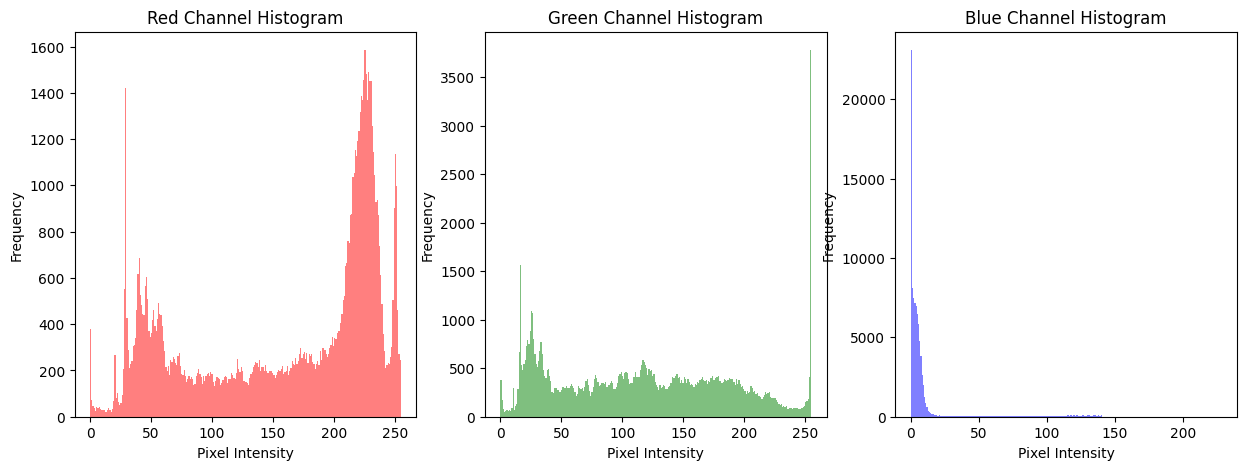

In [22]:
# Tải hình ảnh
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Đọc ảnh với 3 kênh màu (RGB)
image = tf.image.resize(image, size=[300, 300])

# Hiển thị hình ảnh
img = tf.squeeze(image).numpy().astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

# Chuyển đổi hình ảnh thành kiểu dữ liệu float32
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

# Tách các kênh màu
r, g, b = tf.split(image, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")

# Vẽ histogram của các kênh màu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(tf.reshape(r, [-1]), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(tf.reshape(g, [-1]), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(tf.reshape(b, [-1]), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

Overall color index (RGB): 97.51810980902778


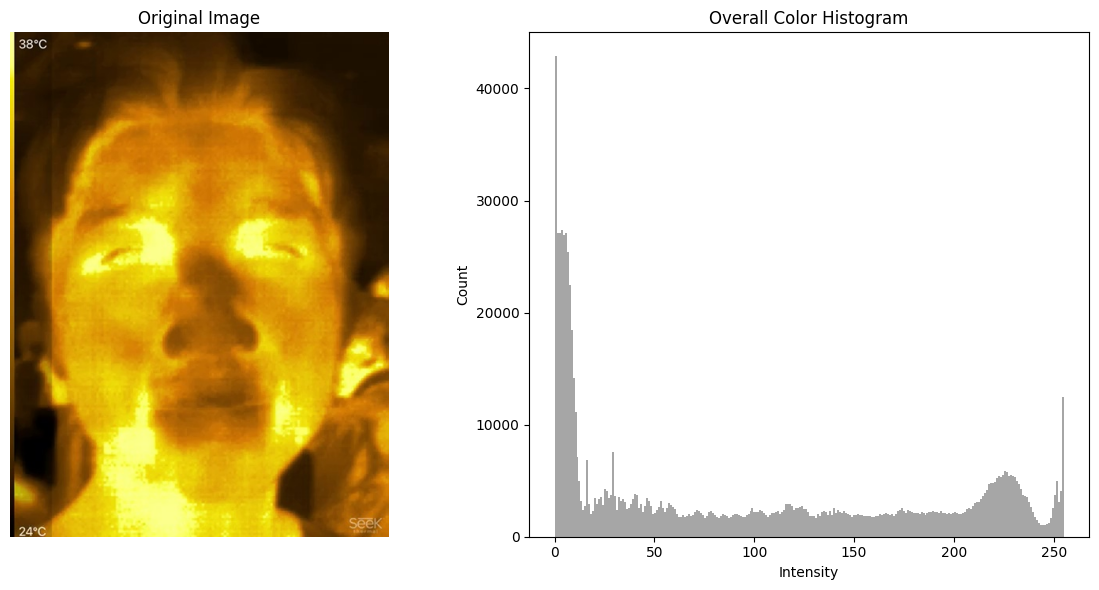

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
image = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu)
overall_color_index = np.mean(image_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB):", overall_color_index)

# Hiển thị hình ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Vẽ histogram dựa trên chỉ số màu sắc tổng thể
plt.subplot(1, 2, 2)
image_flat = image_rgb.ravel()
plt.hist(image_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


Overall color index (RGB): 96.22978624131945


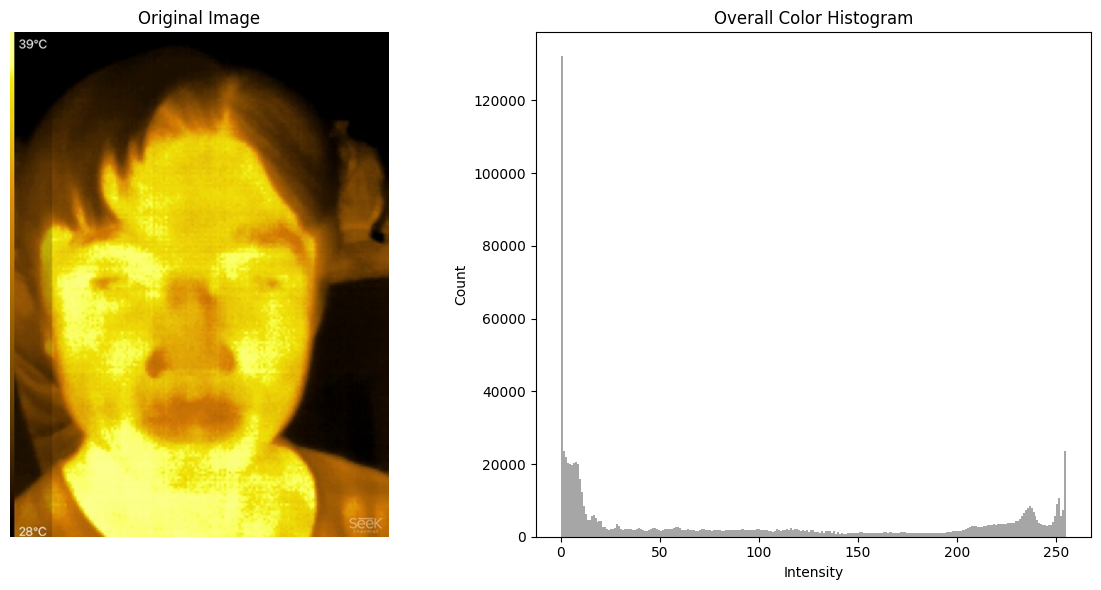

In [5]:
# Đọc hình ảnh
image = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu)
overall_color_index = np.mean(image_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB):", overall_color_index)

# Hiển thị hình ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Vẽ histogram dựa trên chỉ số màu sắc tổng thể
plt.subplot(1, 2, 2)
image_flat = image_rgb.ravel()
plt.hist(image_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


Overall color index (RGB) for Image 1: 97.51810980902778
Overall color index (RGB) for Image 2: 96.22978624131945


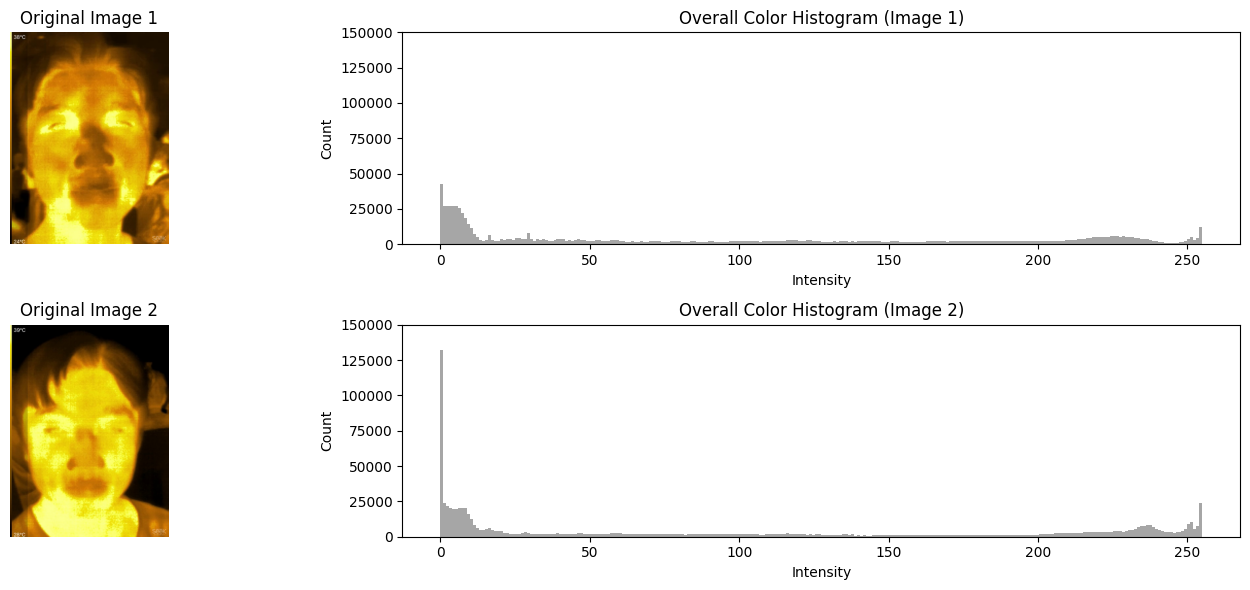

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh đầu tiên
image1 = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')
# Đọc hình ảnh thứ hai
image2 = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu) cho cả hai hình ảnh
overall_color_index1 = np.mean(image1_rgb)
overall_color_index2 = np.mean(image2_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB) for Image 1:", overall_color_index1)
print("Overall color index (RGB) for Image 2:", overall_color_index2)

# Hiển thị hình ảnh và biểu đồ histogram
plt.figure(figsize=(16, 6))

# Hiển thị hình ảnh đầu tiên
plt.subplot(2, 2, 1)
plt.imshow(image1_rgb)
plt.title('Original Image 1')
plt.axis('off')

# Vẽ histogram cho hình ảnh đầu tiên
plt.subplot(2, 2, 2)
image1_flat = image1_rgb.ravel()
plt.hist(image1_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram (Image 1)')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.ylim(0, 150000)

# Hiển thị hình ảnh thứ hai
plt.subplot(2, 2, 3)
plt.imshow(image2_rgb)
plt.title('Original Image 2')
plt.axis('off')

# Vẽ histogram cho hình ảnh thứ hai
plt.subplot(2, 2, 4)
image2_flat = image2_rgb.ravel()
plt.hist(image2_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram (Image 2)')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.ylim(0, 150000)

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


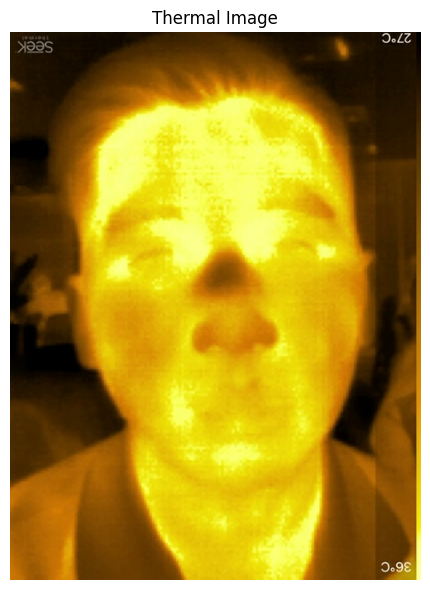

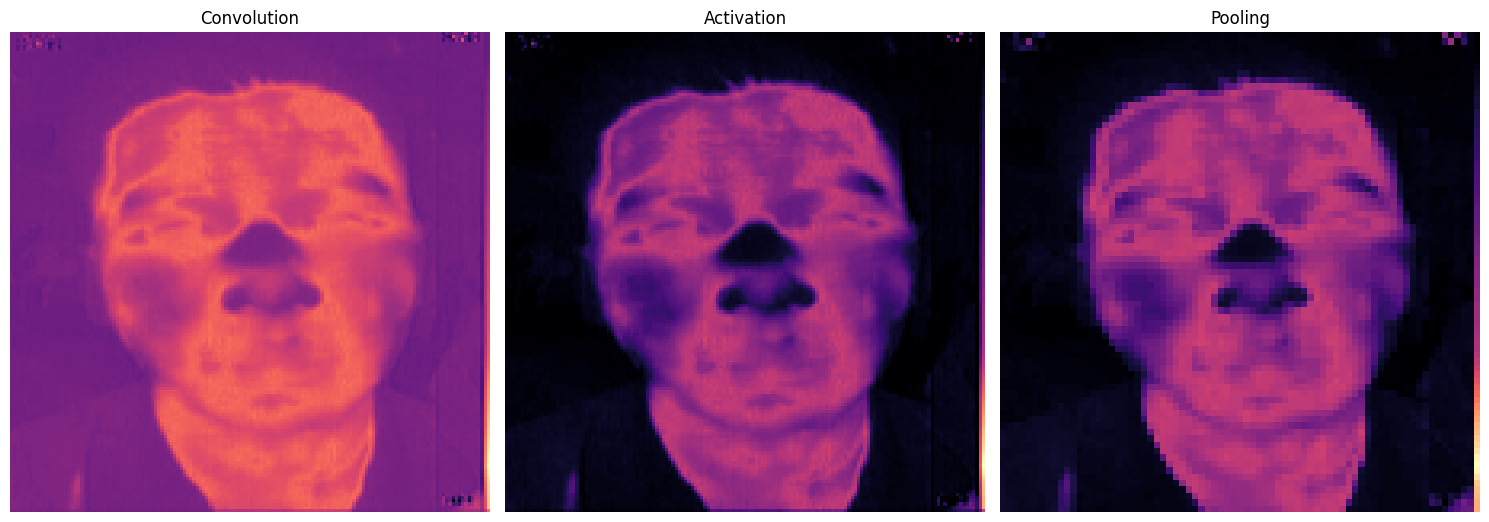

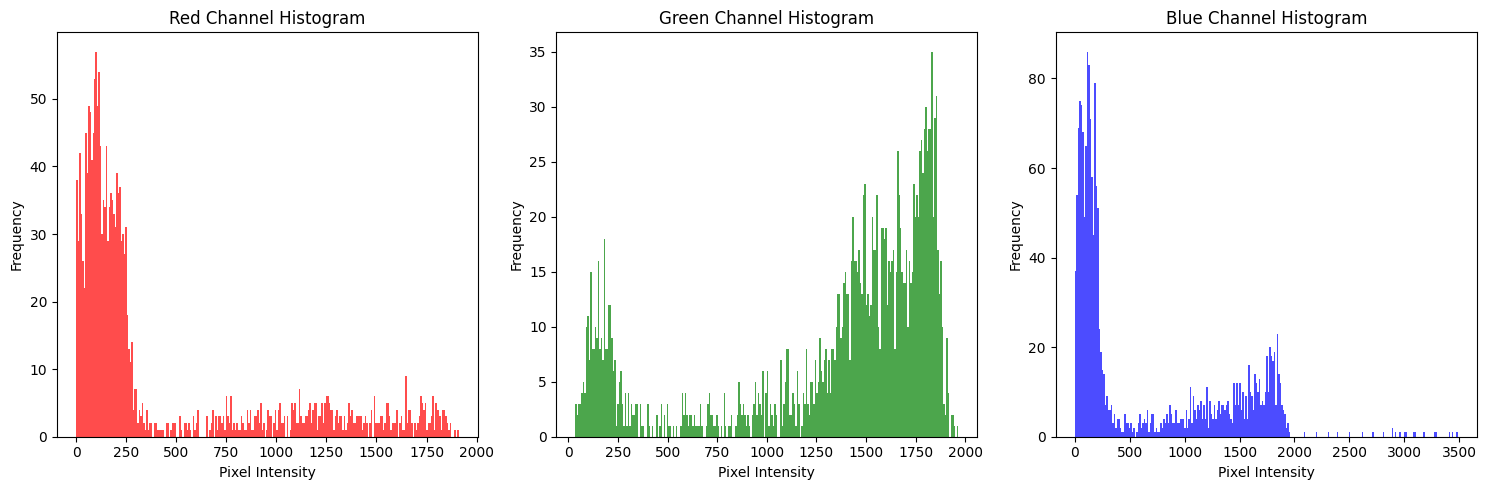

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_3_2.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB

# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

# Convert pooled image back to image format
image_condense = tf.squeeze(image_condense)

# Separate the channels
r, g, b = tf.split(image_condense, num_or_size_splits=3, axis=-1)

# Plot histograms for each channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r.numpy().ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.numpy().ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(b.numpy().ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


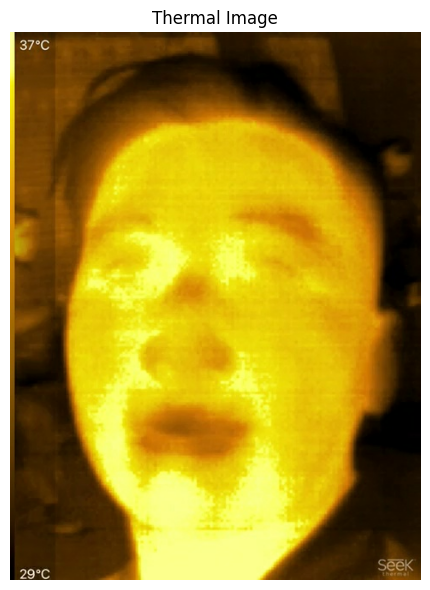

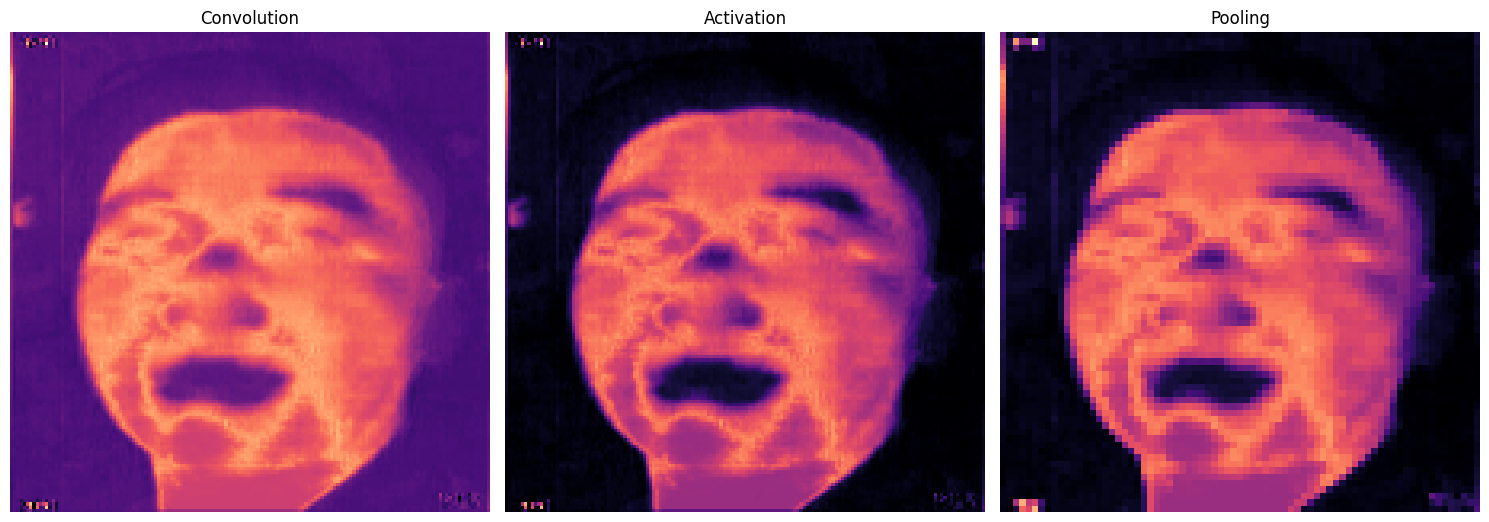

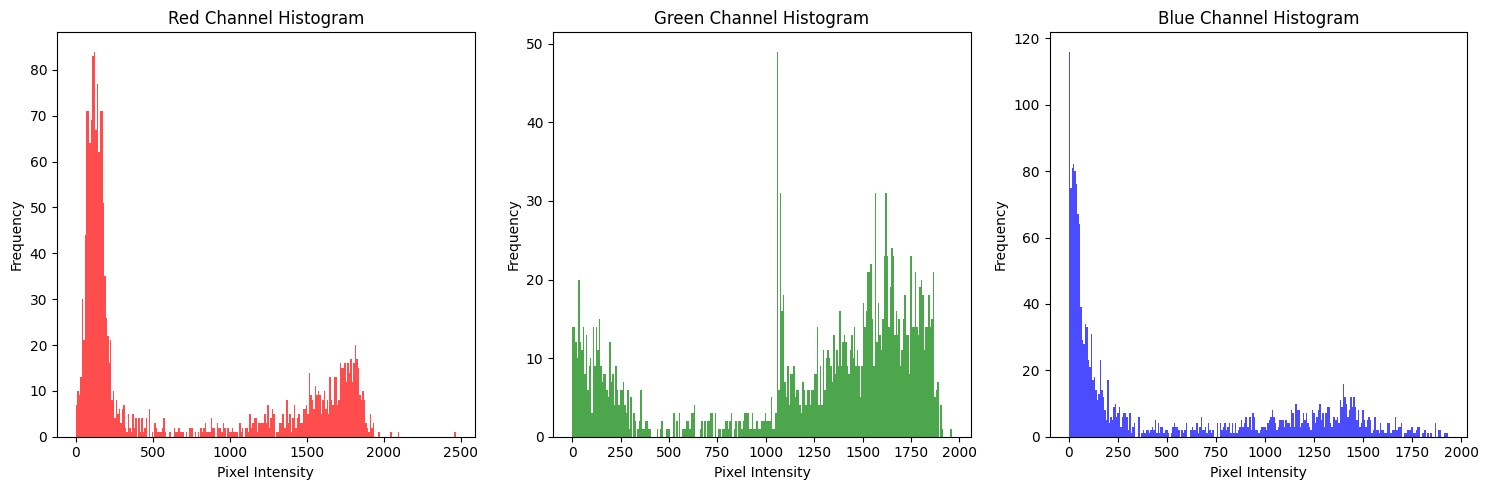

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_23_1.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB

# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

# Convert pooled image back to image format
image_condense = tf.squeeze(image_condense)

# Separate the channels
r, g, b = tf.split(image_condense, num_or_size_splits=3, axis=-1)

# Plot histograms for each channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r.numpy().ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.numpy().ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(b.numpy().ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Overall color index (Image 1): 797.6067
Overall color index (Image 2): 784.15295


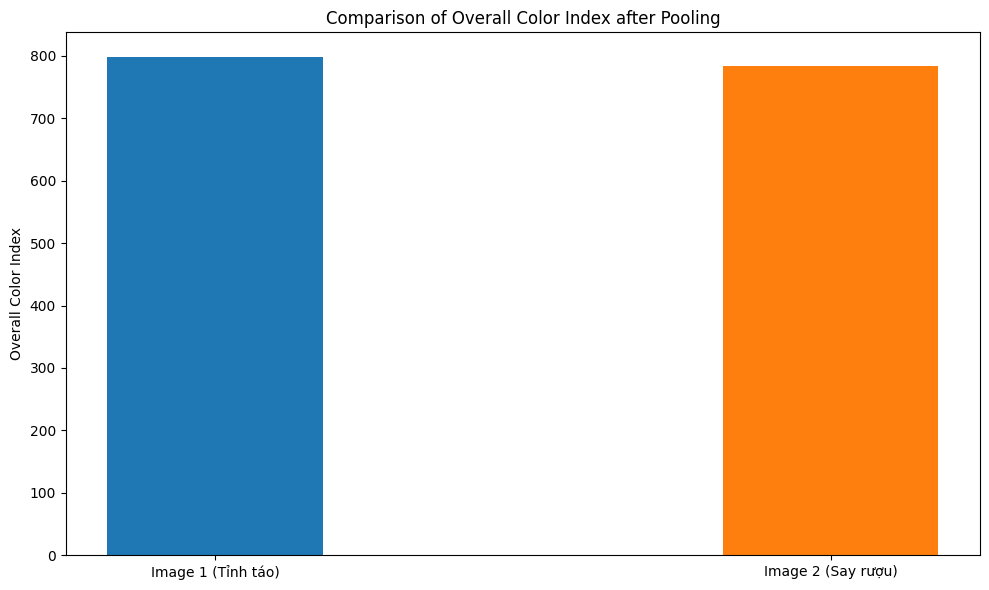

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Đọc và xử lý hình ảnh đầu tiên
image1_path = 'D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_3_2.jpg'
image1 = tf.io.read_file(image1_path)
image1 = tf.io.decode_jpeg(image1, channels=3)
image1 = tf.image.resize(image1, size=[300, 300])
image1 = tf.image.convert_image_dtype(image1, dtype=tf.float32)
image1 = tf.expand_dims(image1, axis=0)

# Đọc và xử lý hình ảnh thứ hai
image2_path = 'D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_23_1.jpg'
image2 = tf.io.read_file(image2_path)
image2 = tf.io.decode_jpeg(image2, channels=3)
image2 = tf.image.resize(image2, size=[300, 300])
image2 = tf.image.convert_image_dtype(image2, dtype=tf.float32)
image2 = tf.expand_dims(image2, axis=0)

# Kernel cho convolution với 3 kênh màu
kernel = tf.constant([
    [[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]]
], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 3, 1])
kernel = tf.tile(kernel, [1, 1, 1, 3])

# Convolution layer
conv_fn = tf.nn.conv2d
image1_filter = conv_fn(input=image1, filters=kernel, strides=2, padding='SAME')
image2_filter = conv_fn(input=image2, filters=kernel, strides=2, padding='SAME')

# Activation layer
relu_fn = tf.nn.relu
image1_detect = relu_fn(image1_filter)
image2_detect = relu_fn(image2_filter)

# Pooling layer
pool = tf.nn.pool
image1_condense = pool(input=image1_detect, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME')
image2_condense = pool(input=image2_detect, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME')

# Convert pooled image back to image format
image1_condense = tf.squeeze(image1_condense, axis=0)
image2_condense = tf.squeeze(image2_condense, axis=0)

# Calculate the overall color index (mean of all color channels)
overall_color_index1 = tf.reduce_mean(image1_condense).numpy()
overall_color_index2 = tf.reduce_mean(image2_condense).numpy()

# Print the overall color index
print("Overall color index (Image 1):", overall_color_index1)
print("Overall color index (Image 2):", overall_color_index2)

# Plot the comparison of overall color indices
labels = ['Image 1 (Tỉnh táo)', 'Image 2 (Say rượu)']
overall_means = [overall_color_index1, overall_color_index2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, overall_means, width, color=['tab:blue', 'tab:orange'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Overall Color Index')
ax.set_title('Comparison of Overall Color Index after Pooling')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

In [14]:
import cv2
import os

def is_blurry(image_path, threshold=150.0):
    # Đọc hình ảnh
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Could not open or find the image.")
    
    # Tính toán độ biến thiên Laplacian của hình ảnh
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    print(laplacian_var)
    
    # Kiểm tra xem hình ảnh có bị mờ hay không
    return laplacian_var < threshold, laplacian_var

def list_blurry_images(directory, threshold=150.0):
    # Lấy danh sách các tập tin trong thư mục
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # Kiểm tra từng hình ảnh và lưu danh sách các hình ảnh bị out nét
    blurry_images = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        is_blur, laplacian_var = is_blurry(image_path, threshold)
        if is_blur:
            blurry_images.append((image_file, laplacian_var))
    
    return blurry_images

# Đường dẫn đến thư mục chứa hình ảnh

# Lọc các hình ảnh bị out nét
blurry_images = list_blurry_images(images_undrunk_6, threshold=150.0)

# def display_blurry_images(directory, blurry_images):
#     # Hiển thị các hình ảnh bị out nét
#     for image_file, laplacian_var in blurry_images:
#         image_path = os.path.join(directory, image_file)
#         image = cv2.imread(image_path)
#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#         plt.figure(figsize=(6, 6))
#         plt.imshow(image_rgb)
#         plt.title(f"{image_file} - Laplacian variance: {laplacian_var:.2f}")
#         plt.axis('off')
#         plt.show()

# Đường dẫn đến thư mục chứa hình ảnh
directory = 'images_undrunk_6'

# Lọc các hình ảnh bị out nét
blurry_images = list_blurry_images(images_undrunk_6, threshold=150.0)

# In ra danh sách các hình ảnh bị out nét và hiển thị chúng
print("Blurry Images:")
for image_file, laplacian_var, image_path in blurry_images:
    print(f"{image_file} is blurry with Laplacian variance: {laplacian_var}")

# Hiển thị các hình ảnh bị out nét
#display_blurry_images(images_undrunk_6,blurry_images)

147.43515824397412
151.08153593610126
154.48333328433569
145.94717844539215
146.77268155314124
147.4470306894514
148.19252816381456
161.03973932545978
164.62299145989948
170.48183469810485
174.46301659239663
170.50386590423585
169.0449703859859
167.52603419239256
172.26219404855303
160.4281434326066
158.166207085069
155.10346867751016
151.95749515770805
152.5722846348127
163.1268685277197
160.38412667333813
162.95446410445112
162.88813956196043
142.47814127905104
156.78557768112816
149.04586265665694
152.77029886457652
156.81567137446933
155.19352243820825
160.94799335526366
155.07511308999588
168.61753518158594
165.34961870395875
167.77998796283936
160.76289025386168
163.36138619731264
160.7694385740492
163.93171040581598
150.31039483434887
152.4998961586846
146.19247104882132
153.24576375621163
161.99724387104249
120.34622124527823
135.06722691929076
136.53237726608907
164.2438651161088
171.5979067479346
179.96893255436152
164.5836637857649
164.53686252911885
175.78280264832182
174.5

ValueError: not enough values to unpack (expected 3, got 2)